### Download datasets

In [1]:
from utils import download_dataset
import pandas as pd
link_train = "https://raw.githubusercontent.com/maxim5/cs229-2018-autumn/main/problem-sets/PS1/data/ds1_train.csv"
link_test = "https://raw.githubusercontent.com/maxim5/cs229-2018-autumn/main/problem-sets/PS1/data/ds1_valid.csv"

train_file = download_dataset(link_train, "./data/ds1_train.csv")
test_file = download_dataset(link_test, "./data/ds1_valid.csv")

link_train2 = "https://raw.githubusercontent.com/maxim5/cs229-2018-autumn/main/problem-sets/PS1/data/ds2_train.csv"
link_test2 = "https://raw.githubusercontent.com/maxim5/cs229-2018-autumn/main/problem-sets/PS1/data/ds2_valid.csv"

train_file2 = download_dataset(link_train, "./data/ds2_train.csv")
test_file2 = download_dataset(link_test, "./data/ds2_valid.csv")


if train_file:
  train_df = pd.read_csv(train_file)
  print("Training dataset:")
  print(train_df.head())

if test_file:
  test_df = pd.read_csv(test_file)
  print("\nTesting dataset:")
  print(test_df.head())

Dataset downloaded successfully as './data/ds1_train.csv'
Dataset downloaded successfully as './data/ds1_valid.csv'
Dataset downloaded successfully as './data/ds2_train.csv'
Dataset downloaded successfully as './data/ds2_valid.csv'
Training dataset:
        x_1         x_2    y
0  2.911809   60.359613  0.0
1  3.774746  344.149284  0.0
2  2.615488  178.222087  0.0
3  2.013694   15.259472  0.0
4  2.757625   66.194174  0.0

Testing dataset:
        x_1         x_2    y
0  2.177396   78.630076  0.0
1  3.952131  123.541573  0.0
2  3.351176   47.752517  0.0
3  2.074934   26.997730  0.0
4  3.579775  226.703779  0.0


In [2]:
from utils import load_dataset
train_path = './data/ds1_train.csv'
test_path  = "./data/ds1_valid.csv"

x_train,y_train = load_dataset(train_path,add_intercept = True)
x_test,y_test = load_dataset(test_path,add_intercept = True)

Text(0, 0.5, 'x2')

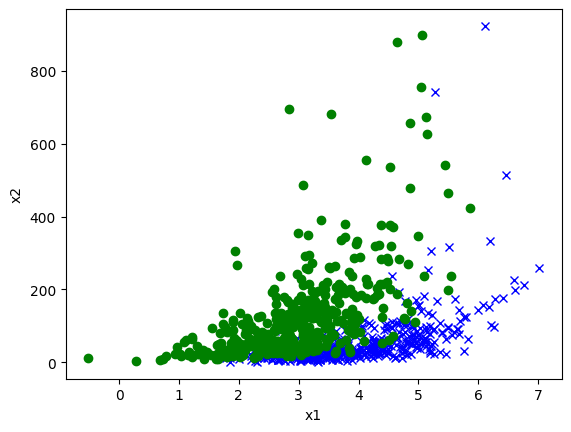

In [3]:
import matplotlib.pyplot as plt
plt.plot(x_train[y_train == 1,-2],x_train[y_train == 1,-1],'bx',linewidth = 2)
plt.plot(x_train[y_train == 0,-2],x_train[y_train == 0,-1],'go',linewidth = 2)
plt.xlabel('x1')
plt.ylabel('x2')

## Logistic Regression


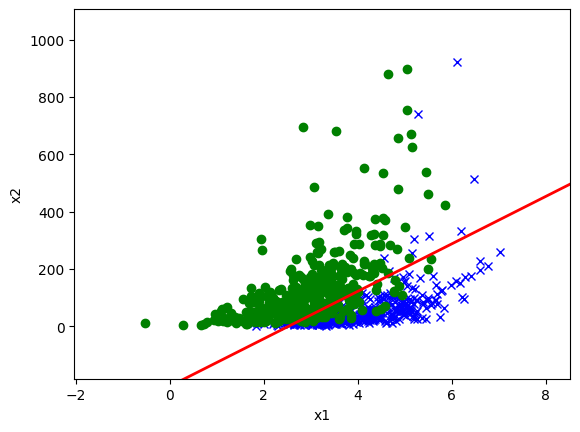

Theta is:  [-6.26018491  2.47707251 -0.0299125 ]
The accuracy on training set is:  0.8825


In [4]:
import numpy as np
from logistic_regression import LogisticRegression
from utils import plot
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
plot(x_train, y_train, logistic_regression.theta)
print("Theta is: ", logistic_regression.theta)
print("The accuracy on training set is: ", np.mean(logistic_regression.predict(x_train) == y_train))

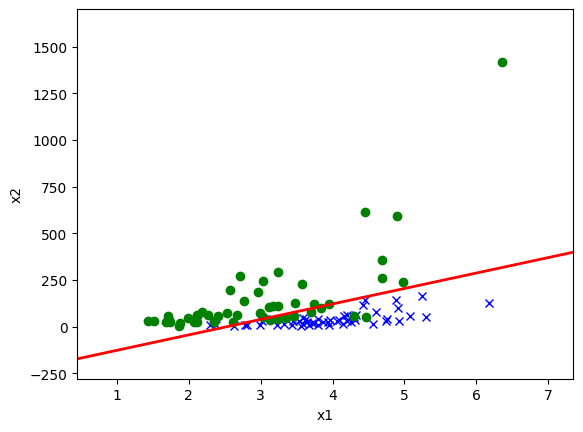

The accuracy on test set is :   0.9


In [5]:
plot(x_test,y_test,logistic_regression.theta)
print('The accuracy on test set is :  ',np.mean(logistic_regression.predict(x_test)==y_test))

## Gaussian Discriminant Analysis

In [6]:
x_train,y_train = load_dataset(train_path,add_intercept = False)
x_test,y_test = load_dataset(test_path,add_intercept = False)

(800, 2)


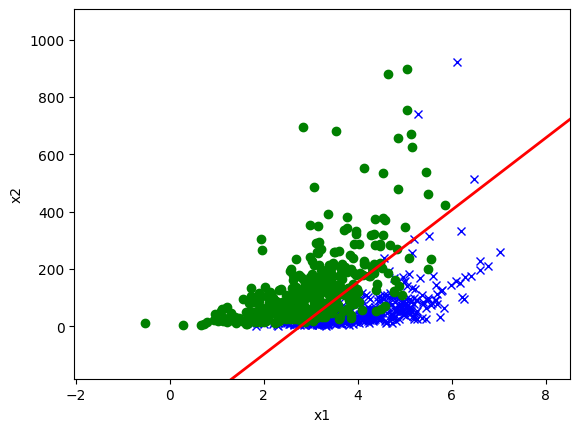

Theta is  [-6.17158405  2.22055506 -0.01763375]
The accuracy on training data is :  0.86625


In [7]:
from utils import plot
from gda import GDA
import numpy as np
gda = GDA()
gda.fit(x_train,y_train)
plot(x_train,y_train,gda.theta)
print("Theta is ",gda.theta)
print("The accuracy on training data is : ",np.mean(gda.predict(x_train)==y_train))

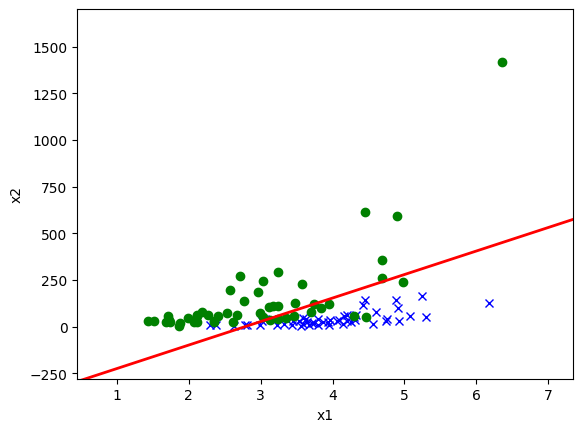

The accuracy on test set is  0.83


In [8]:
plot(x_test,y_test,gda.theta)
print('The accuracy on test set is ', np.mean(gda.predict(x_test)==y_test))

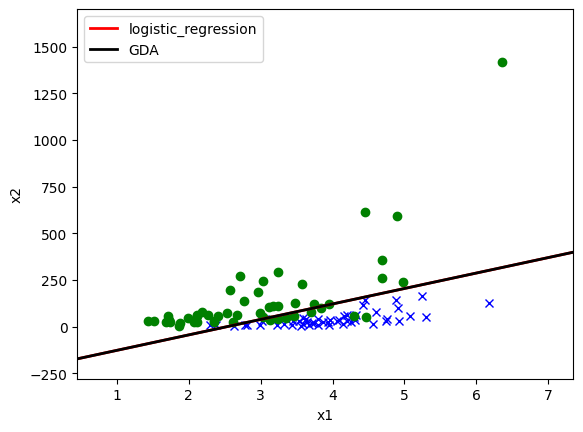

In [9]:
from utils import plot
plot(x_test,y_test,logistic_regression.theta,gda.theta,legend1 = 'logistic_regression',legend2 = 'GDA')

In [15]:
# For dataset 2
from utils import load_dataset
train_path = './data/ds2_train.csv'
test_path  = "./data/ds2_valid.csv"

x_train,y_train = load_dataset(train_path,add_intercept = True)
x_test,y_test = load_dataset(test_path,add_intercept = True)

(800, 2)


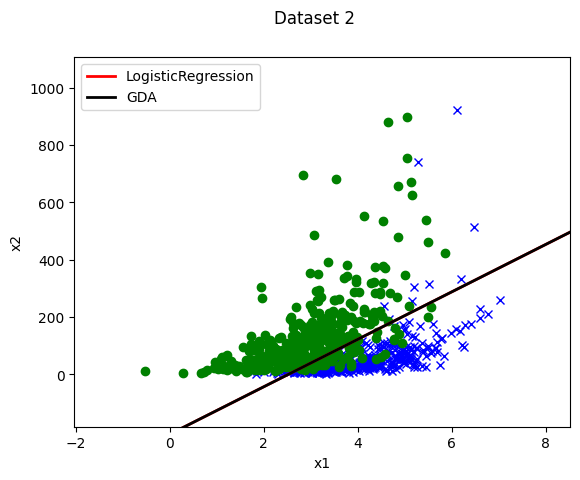

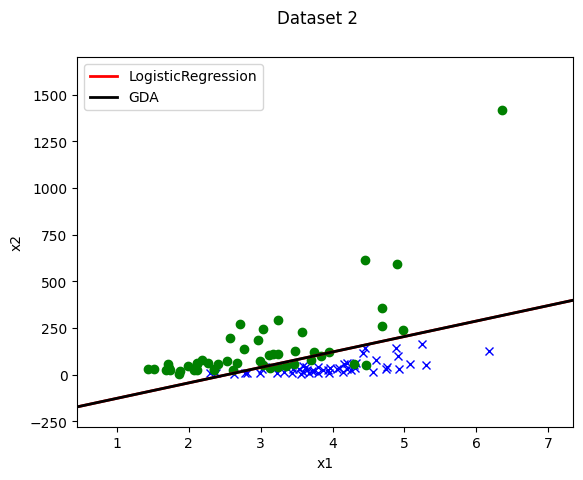

In [16]:
lr2 = LogisticRegression()
lr2.fit(x_train,y_train)


x_train,y_train = load_dataset(train_path,add_intercept = False)
gda2 = GDA()
gda2.fit(x_train,y_train)

plot(x_train,y_train,lr2.theta,gda2.theta,legend1 = 'LogisticRegression',legend2 = 'GDA',title="Dataset 2")
plot(x_test,y_test,lr2.theta,gda2.theta,legend1= 'LogisticRegression',legend2 = 'GDA',title="Dataset 2")

## Observation on dataset1 and datset2
GDA doesnot perform well on dataset1 as it not gaussian data
We can use log transform on the x2 of dataset1 

(800, 2)


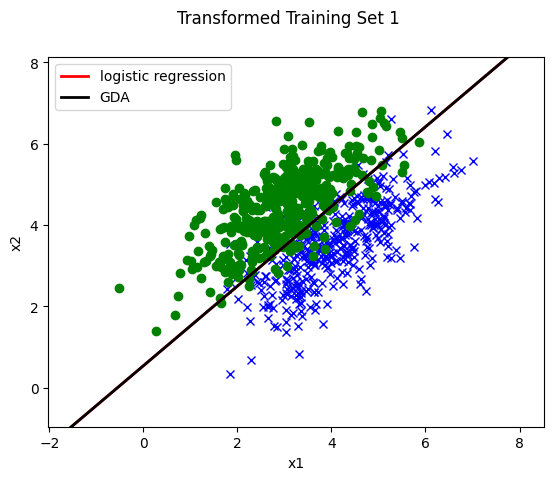

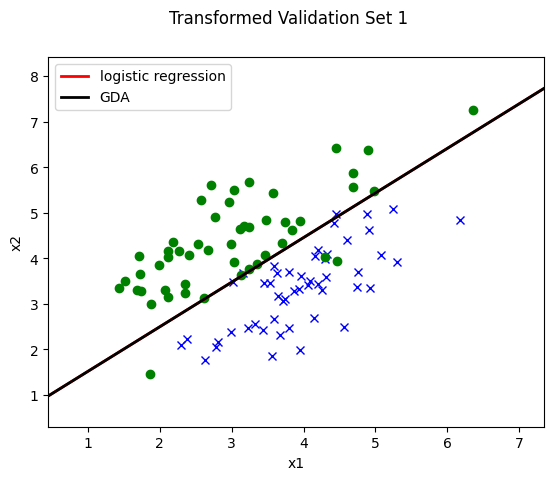

In [20]:
# For dataset 2
from utils import load_dataset,add_intercept
train_path = './data/ds2_train.csv'
test_path  = "./data/ds2_valid.csv"

x_train,y_train = load_dataset(train_path,add_intercept = False)
x_test,y_test = load_dataset(test_path,add_intercept = False)

transformed_x_train = np.stack((x_train[:,0],np.log(x_train[:,1])),axis = 1)
transformed_x_test = np.stack((x_test[:,0],np.log(x_test[:,1])),axis = 1)
gda = GDA()
gda.fit(transformed_x_train,y_train)

# Train logistic regression
transformed_x_train_with_intercept = add_intercept(transformed_x_train)
log_reg = LogisticRegression()
log_reg.fit(transformed_x_train_with_intercept, y_train)

# Plot decision boundaries on training set 1
plot(transformed_x_train, y_train, theta=log_reg.theta, legend1='logistic regression', theta2=gda.theta, legend2='GDA', title='Transformed Training Set 1')

# Plot decision boundaries on validation set 1
plot(transformed_x_test, y_test, theta=log_reg.theta, legend1='logistic regression', theta2=gda.theta, legend2='GDA', title='Transformed Validation Set 1')
